In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from scipy import stats
from pandas import read_csv

In [ ]:
alpha=0.05
critical_value=t.ppf(1-a;pha)

In [ ]:
#Interpretation:
if pval<alpha:
    print("reject null hypothesis: there a significant difference in usage before and after the campaogn mght be due to chance (p<==0.05)")
else:
    print("fail to reject null hypothesis the difference in usage before and after the campaogn might be due to chance (p>=0.05)")
    

In [ ]:
if abs (tstat)>critical_value:
    print("the difference is statistically significant at the 5%lecel (|t|>critical value)")
else:
    print("the difference is statistically significant (|t|<=critical value)")
    

<h1>ANOVA test<h/1>

In [17]:
df=read_csv("cust_seg.csv")
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [18]:
#find how many segments and how many customers per segment we have
print(df.segment.value_counts())


segment
2    105
3     50
1     45
Name: count, dtype: int64


In [4]:
#seperate segments
s1=df.Latest_mon_usage[df.segment==1]
s2=df.Latest_mon_usage[df.segment==2]
s3=df.Latest_mon_usage[df.segment==3]

In [5]:
#anova
fstat,pval=f_oneway(s1,s2,s3)

In [41]:
#degree of fredom
between_df=len(s1)-1
within_df=3

In [42]:
#critical value (alpha=0.5)
alpha=0.5
critical_value=stats.f.ppf(1-alpha,between_df,within_df)  #one tailed critical value


In [43]:
#print results
print(f"\nF-statistic: {fstat:.2f},\np-value:{pval:.4f}")
print(f"critical value (alpha={alpha}): {critical_value:.2f}")


F-statistic: 6.52,
p-value:0.0000
critical value (alpha=0.5): 1.26


In [44]:
#inte4rpretation (add your own logic here)
if pval <alpha:
    print("reject null hypothesis : there a significant difference in latest_mo_usage across customer segment(p<0.05)")
else:
    print("fail to reject null hypothesis : the latest_mon_usage might be similar across segment(p>=0.05)")
    

reject null hypothesis : there a significant difference in latest_mo_usage across customer segment(p<0.05)


In [45]:
if fstat>critical_value:
    print("F-score is greater than the critical value, suggesting significant differences exist")
else:
    print("f- score is not significant enough to reject the null hypothesis.")

F-score is greater than the critical value, suggesting significant differences exist


<h2>assignment<h/2>

In [ ]:
"""
For StudentsPerformance.csv, using ANOVA, find if there is a significant difference in 
Maths marks depending on the level of parental education.
"""

In [33]:
df=read_csv("StudentsPerformance.csv")

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
#find parental education 
print(df['parental level of education'].value_counts())

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [49]:
# #seperate segments
# s1=df.Latest_mon_usage[df.segment==1]
# s2=df.Latest_mon_usage[df.segment==2]
# s3=df.Latest_mon_usage[df.segment==3]

#seperate by parental education
s1=df["math score"][df['parental level of education']=="some college"]
s2=df["math score"][df['parental level of education']=="associate's degree"]
s3=df["math score"][df['parental level of education']=="high school"]
s4=df["math score"][df['parental level of education']=="some high school"]
s5=df["math score"][df['parental level of education']=="bachelor's degree"]
s6=df["math score"][df["parental level of education"]=="master's degree"]


In [50]:
#anova
fstat,pval=f_oneway(s1,s2,s3,s4,s5,s6)

In [51]:
#degree of fredom
between_df=len(s1)-1 # leave default or try doing for all categories or take average of all categories
within_df=6

In [70]:
#critical value (alpha=0.5)
alpha=0.05
critical_value=stats.f.ppf(1-alpha/2,between_df,within_df)  #two tailed critical value

In [71]:
#print results
print(f"f-statistic:{fstat:.2f},\np-value:{pval:.4f}")
print(f"critical value(alpha={alpha}):{critical_value:.2f}")

f-statistic:6.52,
p-value:0.0000
critical value(alpha=0.05):4.88


In [72]:
#inte4rpretation (add your own logic here)

if pval<alpha:
    print("reject null hypothesis : there a significant difference in latest_mo_usage across customer segment(p<0.05)")
else:
    print("fail to reject null hypothesis : the latest_mon_usage might be similar across segment(p>=0.05)")

reject null hypothesis : there a significant difference in latest_mo_usage across customer segment(p<0.05)


In [73]:
if fstat>critical_value:
    print("F-score is greater than the critical value suggesting significant differences exist")
else:
    print("f- score is not significant enougn to reject the null hypothesis")

F-score is greater than the critical value suggesting significant differences exist


<h1>Chi Square Test <h/1>

<h2> chi square test of indenpendacy<h/2>

In [4]:
from scipy.stats import chi2
print(chi2.isf(0.05,5))

11.070497693516355


In [5]:
import pandas as pd 
import scipy.stats as stats


In [6]:
df = pd.read_csv("airline_passenger_satisfaction (1).csv")

In [8]:
# create a contingency
contingency_table = pd.crosstab(df['Customer Type'],df['Satisfaction'])
print("contingency_table")
print(contingency_table)

contingency_table
Satisfaction   Neutral or Dissatisfied  Satisfied
Customer Type                                    
First-time                       18080       5700
Returning                        55372      50728


In [9]:
# run chi square test of indenpendacy
chi2,p,dof,ex = stats.chi2_contingency(contingency_table)

In [10]:
print("\n chisquare test fro customer type and satisfaction")
print(f"chi2 statitics: {chi2}")
print(f"p value : {p}")
print(f" Degree of freedom : {dof}")



 chisquare test fro customer type and satisfaction
chi2 statitics: 4493.188803283598
p value : 0.0
 Degree of freedom : 1


In [11]:
# expected frequencies table  : if H0 were  to be true we would except to see this values in the cell  
print("Expected frequency table : ")
print(ex)


Expected frequency table : 
[[13448.47982753 10331.52017247]
 [60003.52017247 46096.47982753]]


In [12]:
alpha = 0.05
if p < alpha:
    print("there is significant difference associatation between customer type and satisfaction (reject the null hypothisis) ")
else:    
    print("there is no significant difference associatation between customer type and satisfaction (fail to reject the null hypothisis) ")
    



there is significant difference associatation between customer type and satisfaction (reject the null hypothisis) 


In [15]:
# finding critical value using python
from scipy.stats import chi2
crit = chi2.isf(alpha,dof)


<h2>Example<h/2>

In [17]:
import pandas as pd 
from scipy.stats import chi2_contingency

In [18]:
df=pd.read_csv("titanic-tested.csv")

In [ ]:
"""
nulll hypothesis (h0): assumes there is no association between the variables we re testing (passenger class and survival))
alternative hypothesis (ha) : Assumes there is an association between the variables
"""

In [19]:
#create a contingency table
contingency_table=pd.crosstab(df["Pclass"],df["Survived"])
print(contingency_table)

Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72


In [20]:
#perform the chi square test 
chi2_stat,p_value,dof,expected=chi2_contingency(contingency_table)


In [25]:
#print the results
print("chisquare test fro customer type and satisfaction")
print(f"chi2 statitics: {chi2_stat}")
print(f"p value : {p_value}")
print(f"Degree of freedom : {dof}")


chisquare test fro customer type and satisfaction
chi2 statitics: 6.693869422819262
p value : 0.03519206276590605
Degree of freedom : 2


In [27]:
#interpretation 
if p_value<0.05:
    print("reject H0 so there is a statistically significant association between passenger class and survival (p<0.05)")
else:
    print("do not reject H0 so there is no statistically signuficant association between passenger class and survival (p>=0.05)")
          

reject H0 so there is a statistically significant association between passenger class and survival (p<0.05)


<h2>Assignment<h/2>

In [32]:
df = pd.read_csv("Amazon Sale Report.csv")

C:\Users\dbda\AppData\Local\Temp\ipykernel_15124\652367067.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


In [34]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [39]:
df_new = df[(df["Status"]=="Cancelled")|(df["Status"]=="Pending")]



In [41]:
#create a contingency table
contingency_table = pd.crosstab(df_new["Status"],df_new["Fulfilment"])
print(contingency_table)



Fulfilment  Amazon  Merchant
Status                      
Cancelled    11471      6861
Pending        415       243


In [44]:
#perform the chi square test 

chi2_stats,p,dof,expected = chi2_contingency(contingency_table)


In [49]:
#print the results
print("chisquare test for customer type and satisfaction")
print(f"chi2 statitics: {chi2_stats}")
print(f"p value : {p}")
print(f"Degree of freedom : {dof}")


chisquare test for customer type and satisfaction
chi2 statitics: 0.04729799287402296
p value : 0.8278334990054204
Degree of freedom : 1


In [50]:
#interpretation 
if p<0.05:
    print("reject H0 so there is a statistically significant association between passenger class and survival (p<0.05)")
else:
    print("do not reject H0 so there is no statistically signuficant association between passenger class and survival (p>=0.05)")
     

do not reject H0 so there is no statistically signuficant association between passenger class and survival (p>=0.05)


Correlation


<h2>Correaltion<h/2

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv("loan.csv")

In [59]:
# calculate corelation corelation
correlation_coeficient = df['age'].corr(df['income'])

print(f'Correlation coeficient : {correlation_coeficient}')

Correlation coeficient : 0.4762180840211062


0      135
1        4
2       15
3       79
4        4
      ... 
845     -2
846     84
847    -10
848    -11
849      4
Length: 850, dtype: int64


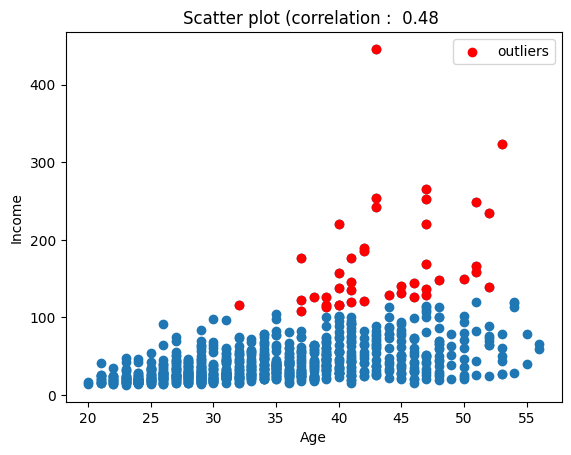

In [75]:
# plot a scatter plot to visulization the data 
plt.scatter(df['age'],df['income']) 
plt.xlabel("Age")
plt.ylabel("Income")
plt.title(f"Scatter plot (correlation : {correlation_coeficient : .2f} ")


# indentify potential outlier (eg values with residual greater than 2 times the standard deviation )
residuals = df['income'] - df['age']
print(residuals)
std_deviation = residuals.std()
outliers = df[abs(residuals)  > 2* std_deviation ]
# 



#Hightlight potential outliers on the scatter ploty 
plt.scatter(outliers['age'],outliers['income'],color = 'red',label = 'outliers')
plt.legend()
plt.show()


Example

In [77]:
import pandas as pd 
import matplotlib.pyplot as plt


In [91]:
df = pd.read_csv("happyscore_income.csv")
# Clculation of correlation coeficient
correletion_coeficient  = df['median_income'].corr(df['happyScore'])
print(f'Correletion Coefcient :{correletion_coeficient}')

Correletion Coefcient :0.7603279373397435


0       1727.156667
1       1040.207000
2       5102.826000
3      16872.420000
4      15838.776000
           ...     
106     5262.741667
107     1638.220000
108     1501.758000
109      504.931000
110     1225.990000
Length: 111, dtype: float64


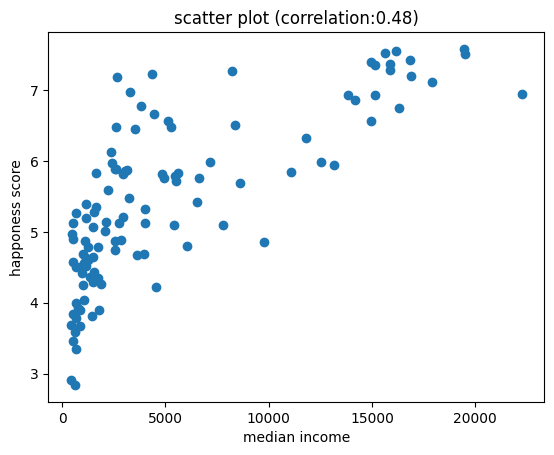

In [92]:
# plot scatter plot to visulization the data 
plt.scatter (df["median_income"],df['happyScore'])
plt.xlabel("median income")
plt.ylabel("happoness score")
plt.title(f"scatter plot (correlation:{correlation_coeficient:.2f})")
#Identify potential outliers (eg. values with residuals greater than  2 times the standard deviation )
residuals=df["median_income"]-df['happyScore']
print(residuals)

Correletion Coefcient :0.99560521640439
0       1727.156667
1       1040.207000
2       5102.826000
3      16872.420000
4      15838.776000
           ...     
106     5262.741667
107     1638.220000
108     1501.758000
109      504.931000
110     1225.990000
Length: 111, dtype: float64


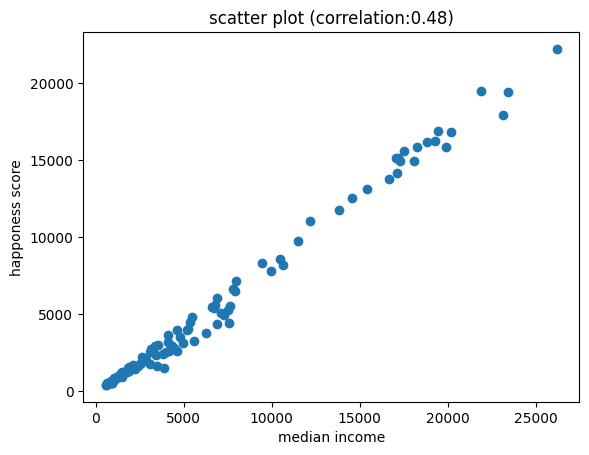

In [90]:

correletion_coeficient  = df['avg_income'].corr(df['median_income'])
print(f'Correletion Coefcient :{correletion_coeficient}')



# plot scatter plot to visulization the data 
plt.scatter (df["avg_income"],df['median_income'])
plt.xlabel("median income")
plt.ylabel("happoness score")
plt.title(f"scatter plot (correlation:{correlation_coeficient:.2f})")
#Identify potential outliers (eg. values with residuals greater than  2 times the standard deviation )
residuals=df["median_income"]-df['happyScore']
print(residuals)

<h1>assignment <h/1>

In [101]:
df1 = pd.read_csv("marathon_results_2015.csv")
df2 = pd.read_csv("marathon_results_2016.csv")
df3 = pd.read_csv("marathon_results_2017.csv")

In [102]:
df =pd.concat([df1,df2,df3])

In [103]:
df.head(10)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN
5,5.0,9,"Chepkwony, Frankline",30,M,Koibatek,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:18,0:05:00,-,2:10:52,6,6,6,NaN
6,6.0,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,NaN,NaN,...,1:31:59,1:48:06,2:04:05,0:05:01,-,2:11:20,7,7,7,NaN
7,7.0,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,NaN,NaN,...,1:31:59,1:47:59,2:04:58,0:05:04,-,2:12:42,8,8,8,NaN
8,8.0,5,"Tola, Tadese",27,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:32:00,1:48:00,2:04:39,0:05:06,-,2:13:35,9,9,9,NaN
9,9.0,16,"Shafar, Vitaliy",33,M,Lutsk,NaN,UKR,NaN,NaN,...,1:33:11,1:49:43,2:06:16,0:05:07,-,2:13:52,10,10,10,NaN


In [109]:
# split the 'official time ' columns into hours ,minutes and seconds
df[['Hours','Minutes','Seconds']] =df['Official Time'].str.split(':',expand = True)
# convert hours, minutes and seconds columns to integers
df['Hours'] = df['Hours'].astype(int)
df['Minutes'] = df['Minutes'].astype(int)
df['Seconds'] = df['Seconds'].astype(int)

df['finish_time_in_minutes'] = (df.Hours * 60) + (df.Minutes) + (df.Seconds/60)


df[['pHours','pMinutes','pSeconds']] =df['Pace'].str.split(':',expand = True)
df['pHours'] = df['pHours'].astype(int)
df['pMinutes'] = df['pMinutes'].astype(int)
df['pSeconds'] = df['pSeconds'].astype(int)
df['pace_in_minute'] = (df.pHours * 60) + (df.pMinutes) +(df.pSeconds/60)

In [110]:
df.head(       )

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Unnamed: 8,Hours,Minutes,Seconds,finish_time_in_minutes,pHours,pMinutes,pSeconds,peace_in_minute,pace_in_minute
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,NaN,2,9,17,129.283333,0,4,56,4.933333,4.933333
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,NaN,2,9,48,129.800000,0,4,58,4.966667,4.966667
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,NaN,2,10,22,130.366667,0,4,59,4.983333,4.983333
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,NaN,2,10,47,130.783333,0,5,0,5.000000,5.000000
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,NaN,2,10,49,130.816667,0,5,0,5.000000,5.000000


In [113]:
# find correltion coeficient 
correletion_coeficient = df["pace_in_minute"].corr(df["finish_time_in_minutes"])

0       -124.350000
1       -124.833333
2       -125.383333
3       -125.783333
4       -125.816667
            ...    
26405   -413.250000
26406   -420.316667
26407   -422.833333
26408   -423.916667
26409   -459.983333
Length: 79638, dtype: float64


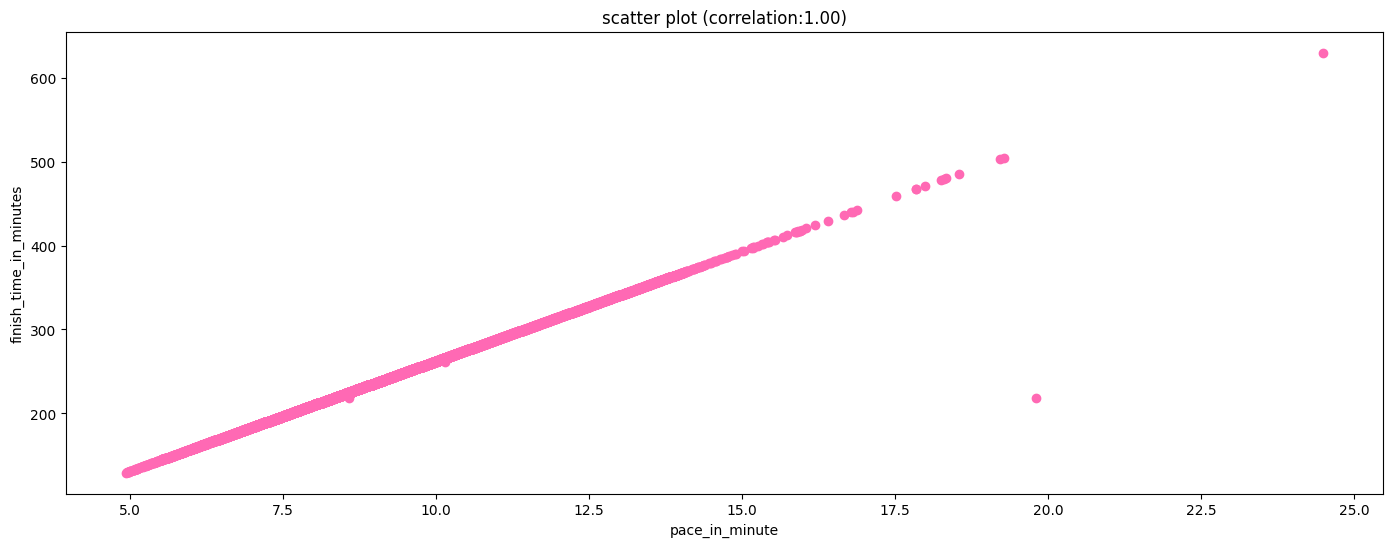

In [116]:
plt.figure(figsize=(17,6))
plt.scatter (df["pace_in_minute"],df['finish_time_in_minutes'],color="hotpink")
plt.xlabel("pace_in_minute")
plt.ylabel("finish_time_in_minutes")
plt.title(f"scatter plot (correlation:{correletion_coeficient:.2f})")
#Identify potential outliers (eg. values with residuals greater than  2 times the standard deviation )
residuals=df["pace_in_minute"]-df["finish_time_in_minutes"]
print(residuals)





<h2>covariation<h/2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("SP500 oil gold bitcoin.csv")

In [15]:
df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
0,2010-07-18,0.1,75.37,76.01,1188.0,1064.88
1,2010-07-19,0.1,75.62,76.54,1181.7,1071.25
2,2010-07-20,0.1,76.22,77.44,1191.5,1083.48
3,2010-07-21,0.1,75.37,76.56,1191.6,1069.59
4,2010-07-22,0.1,77.82,79.30,1195.5,1093.67


In [16]:
#calculate correlation 
corr =df[["BITCOIN",'Gold',"S&P500"]].corr()

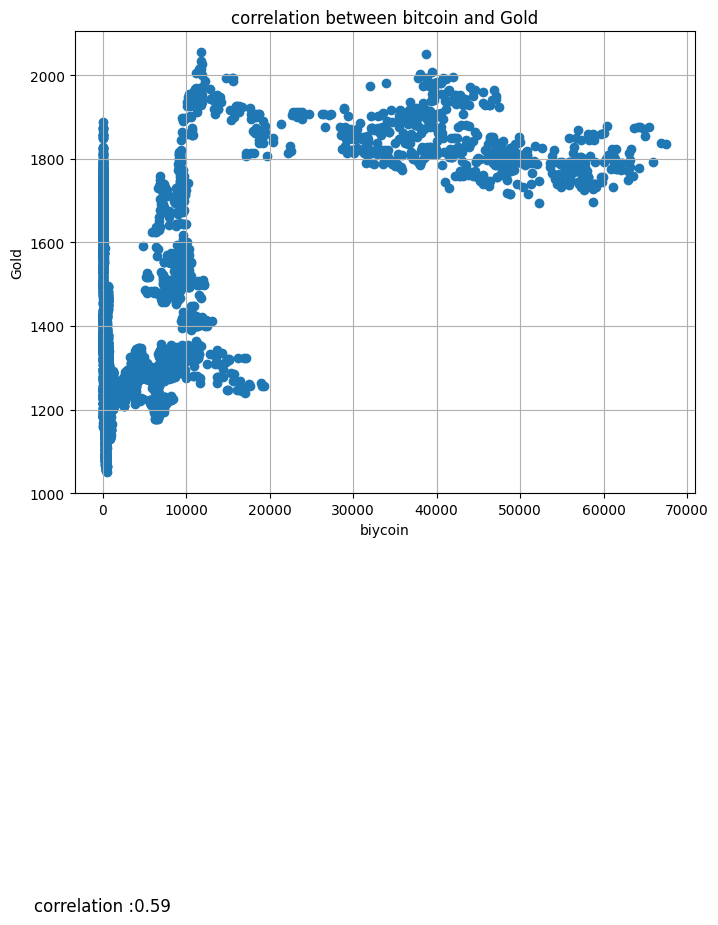

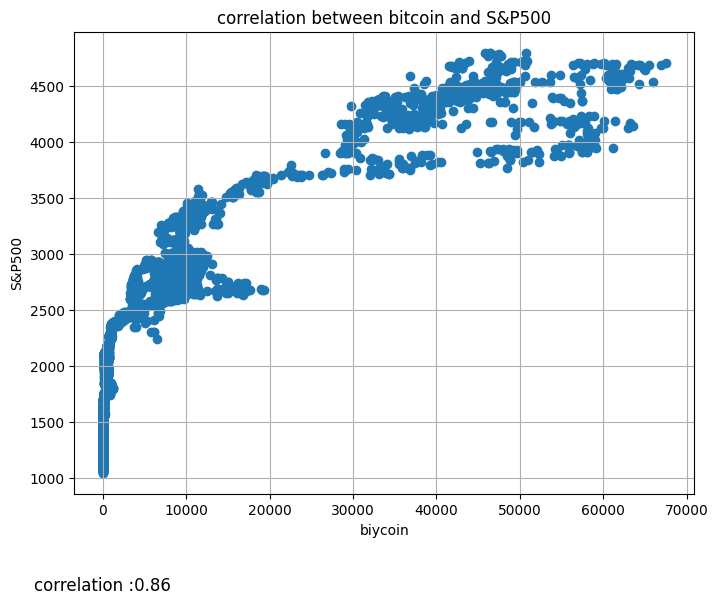

In [17]:
#Create the scatter plot for bitcoin vs other column 
for col in  ['Gold','S&P500']:
    plt.figure(figsize=(8,6))
    plt.scatter(df['BITCOIN'],df[col])
    plt.title(f"correlation between bitcoin and {col}")
    plt.xlabel("biycoin")
    plt.ylabel(col)
    plt.text(0.7,0.3,f"correlation :{corr.loc["BITCOIN",col]:.2f}",ha="center",fontsize=12)
    plt.grid(True)
    plt.show()

In [20]:
#print th e correlation matrix
print("correlation matrix:")
corr

correlation matrix:


,BITCOIN,Gold,S&P500
BITCOIN,1.000000,0.594622,0.862225
Gold,0.594622,1.000000,0.445658
S&P500,0.862225,0.445658,1.000000


In [21]:
cov=df[["BITCOIN",'Gold',"S&P500"]].cov()

In [22]:
#print th e covariance matrix
print("\n covariance matrix:")
print(cov)
# Also print without scientific notation (e)
print(cov.to_string(float_format = '{:0.4}'.format)) # format to 4 decimal places


 covariance matrix:
              BITCOIN          Gold        S&P500
BITCOIN  2.134886e+08  2.124359e+06  1.187061e+07
Gold     2.124359e+06  5.978601e+04  1.026755e+05
S&P500   1.187061e+07  1.026755e+05  8.878310e+05
          BITCOIN      Gold    S&P500
BITCOIN 2.135e+08 2.124e+06 1.187e+07
Gold    2.124e+06 5.979e+04 1.027e+05
S&P500  1.187e+07 1.027e+05 8.878e+05
